# Partie 3 - Modele predictif 3 : Random Forest Classifier

## Presentation du modele

Le Random Forest Classifier est un algorithme d'apprentissage supervisé utilisé pour la classification. Il construit plusieurs arbres de décision en parallèle, chacun entraîné sur un sous-ensemble aléatoire des données (via le bootstrap) et en utilisant un sous-ensemble aléatoire des caractéristiques. Lors de la prédiction, chaque arbre "vote" pour une classe, et la classe finale est déterminée par le vote majoritaire. Cette méthode, appelée ensembling, réduit le surajustement (overfitting) et améliore la précision en combinant les résultats de nombreux modèles simples. Le Random Forest est robuste, facile à utiliser et performant, même sur des données complexes ou bruyantes.

# Random Forest Classifier

## Importation des Bibliothèques et du Dataset



In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

data = pd.read_csv('heart_disease_by_ceo.csv', index_col=0)

## Division des données 

On va ensuite divise notre data frame en deux ensembles afin d'entrainer notre modele.

D'abord assigner toutes les valeurs sauf Heart diseases dans x et Heart diseases dans y.

In [35]:
x = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

Puis je vais diviser mes données de la manière suivante : 

80% pour l'entrainement et 20% pour le test.

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Entrainement du modèle et Prédiction

On va ensuite entrainer notre modèle sur les données d'entrainement et ressortir une note de précision.

In [37]:

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8586956521739131


## Visualisation des résultats

A l'aide d'un arbres de décision, on va visualiser les résultats de notre modèle dans un premier temps.

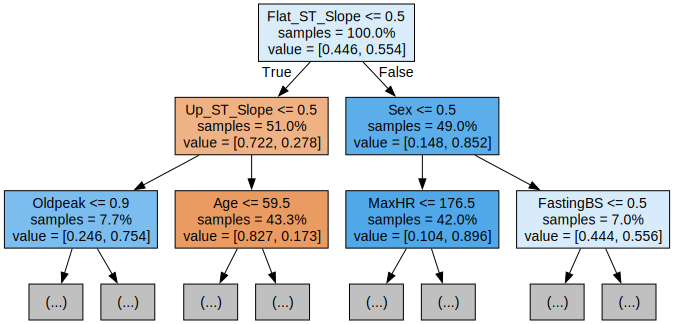

In [38]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,feature_names=x.columns, filled=True, max_depth=2, impurity=False, proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

### Sous partie : Paramètres du modèle

Dans le cas d'un Random Forest Classifier, on peut modifier plusieurs paramètres pour améliorer la précision de notre modèle.

On va donc essayer de modifier les paramètres afin d'obtenir la meilleure précision possible. Pour cela on va utiliser la fonction GridSearchCV de la bibliothèque sklearn qui va nous permettre de tester plusieurs combinaisons de paramètres et de ressortir la plus optimale.

In [39]:
param_dist = {'n_estimators' : randint(5,500), 'max_depth': randint(1, 20)}

rf = RandomForestClassifier(random_state=42)

rand_search = RandomizedSearchCV(rf, param_dist, cv=5, n_iter=5)
rand_search.fit(x_train, y_train)
best_rf = rand_search.best_estimator_
print("Meilleurs Parametres: ", rand_search.best_params_)

Meilleurs Parametres:  {'max_depth': 7, 'n_estimators': 123}


On va ensuite afficher ensuite l'exactitude, la precision et le recall de notre modele. 

Et enfin on va afficher la matrice de confusion de notre modèle.

Accuracy: 0.8695652173913043
Precision: 0.9
Recall: 0.8839285714285714
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        72
           1       0.90      0.88      0.89       112

    accuracy                           0.87       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.87      0.87       184



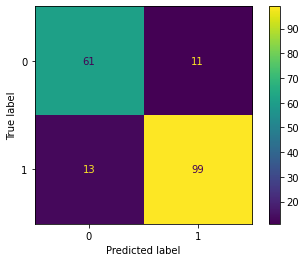

In [40]:
y_pred = best_rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

print("Classification Report:")
print(classification_report(y_test, y_pred))


## Analyse de l'importances des variables

Importance des caractéristiques:
              Feature  Importance
15        Up_ST_Slope    0.174981
7             Oldpeak    0.121632
16      Flat_ST_Slope    0.116713
6      ExerciseAngina    0.102567
11      ASY_ChestPain    0.102154
5               MaxHR    0.077008
0                 Age    0.055583
2           RestingBP    0.050817
3         Cholesterol    0.049180
1                 Sex    0.037630
9       ATA_ChestPain    0.033756
4           FastingBS    0.020586
10      NAP_ChestPain    0.014256
14     LVH_RestingECG    0.012544
17      Down_ST_Slope    0.009097
12  Normal_RestingECG    0.007723
8        TA_ChestPain    0.006947
13      ST_RestingECG    0.006825


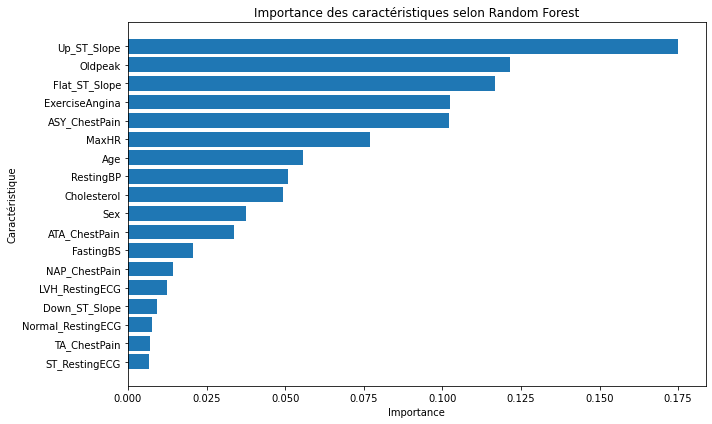

In [41]:
# Analyse de l'importances des variables
importances = best_rf.feature_importances_ 
feature_importance_df = pd.DataFrame({
    'Feature': x.columns, 
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("Importance des caractéristiques:")
print(feature_importance_df)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Caractéristique')
plt.title('Importance des caractéristiques selon Random Forest')
plt.gca().invert_yaxis()  # Pour afficher la plus importante en haut
plt.tight_layout()
plt.show()

Pour notre Random Forest Classifier, la caractéristique la plus importante est le Up_ST_Slope suivie de Flat_ST_Slope. 

## Teste de notre modèle

### Fonctions de test

On va tester avec des patients de test pour voir si notre modèle est capable de prédire correctement les maladies cardiaques. Pour cela on va utiliser les fonctions suivantes :

In [42]:
def tester_patient(liste_colonne, patient):
    df = pd.DataFrame(patient, columns=liste_colonne)
    prediction = best_rf.predict(df)
    if prediction == 1:
        print("Le patient est malade")
    else:
        print("Le patient est en bonne santé")

def tester_plusieurs_patients(liste_colonne, patients):
    index = 1
    for patient in patients:
        print(f"Patient {index}")
        tester_patient(liste_colonne, patient)
        print("\n")
        index += 1

### Données de test

Avec les fonctions definies précédemment, on va tester notre modèle avec les données suivantes :

In [43]:
#test 

liste_colonnes = ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 
                  'MaxHR', 'ExerciseAngina', 'Oldpeak', 'TA_ChestPain', 
                  'ATA_ChestPain', 'NAP_ChestPain', 'ASY_ChestPain', 
                  'Normal_RestingECG', 'ST_RestingECG', 'LVH_RestingECG', 
                  'Up_ST_Slope', 'Flat_ST_Slope', 'Down_ST_Slope']


patient = [[40,0,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1,0,0]] #0 pas malade
patient2 = [[57,1,130,236,0,174,0,0.0,0,1,0,0,0,0,1,0,1,0]] #916 malade
patient3 = [[57,0,130,131,0,115,1,1.2,0,0,0,1,1,0,0,0,1,0]] #915 malade
patient4 = [[59,0,164,176,1,90,0,1.0,0,0,0,1,0,0,1,0,1,0]] #911 malade
patient5 = [[49,1,160,180,0,156,0,1.0,0,0,1,0,1,0,0,0,1,0]] #1 malade

liste_patients = [patient, patient2, patient3, patient4, patient5]
tester_plusieurs_patients(liste_colonnes, liste_patients)



Patient 1
Le patient est en bonne santé


Patient 2
Le patient est malade


Patient 3
Le patient est malade


Patient 4
Le patient est malade


Patient 5
Le patient est malade




# Conclusion et Note

## Note

- Perfomance : 
    - Precision :84 % pour les nons malades et 92 % pour les malades.
    - Accuracy : 89 %
    - Recall : 88% pour les non malades et 89 % pour les malades.
    - F1 Score : 86 % pour les non malades et 90 % pour les malades.
    - Capacite a reconnaitre les faux positifs et les faux negatifs : Il a reussi tous les tests et a reconnu quand un patient etait malade ou non malade.

Les resutats sont tres encourageants et montrent que le modele est capable dans la majorité des cas de reconnaitre la presence ou non de maladies cardiaques. Je donne une note de 2/2 pour ce modele.

- Robustesse : Le modele est robuste et a reussi tout les tests. Lors de mes premiers tests, les resultats du modele se modifiaient d'une iteration a une autre. Apres une seconde verification, j'ai compris que c'etait du a la fonction random_state qui permet de fixer l'aleatoire. Néanmoins je donne une note de 1/1 pour ce modele.

- Complexité et Rapidité  : Le modele est intuitif. Il est egalement assez rapide bien qu'il soit plus lent que les autres et ne prend pas beaucoup de temps a s'entrainer. Je donne une note de 0,75/1 pour ce modele.

- Interpretabilité et Explicabilité : Le modele est difficilement intepretable sans outils specifique mais avec ses derniers il devient assez simple. Il est egalement explicable et permet de comprendre comment il a pris ses decisions. Je donne une note de 1/1 pour ce modele.

- Note Finale : 4,75/2

## Avantages

Le modele Random Forest Classifier présente plusieurs avantages. Tout d'abord dans notre cas (une base de données de relations non-linéaires), il est tres performant et tres robuste vis-à-vis au bruits. En plus, le modele est tres performant pour la validation des données croisées et reste stable dans le temps. 

## Inconvénients

Le modele Random Forest reste assez complexe et difficilement interpretable sans outils specifiques (SHAP, par exemple). Ces inconvenients le rende un peu difficile a utiliser et comprendre pour les personnes non experimentees.